# Measuring Neutrino Mass

Despite the neutrino being the most abundant (matter) particle in the universe we still do not know one of its fundamental characteristics, its mass. Neutrino oscillation experiments have proven definitively that neutrinos must have mass (otherwise they would not be able to change flavour via quantum mechanical mixing), but the absolute value of the mass is almost completely unknown.

## How do we measure the neutrino mass?

Way back in the 1930s Enrico Fermi (who named the neutrino) was the first to suggest a way of measuring the neutrino mass. His solution was to look at the energy of electrons coming from beta decay.

![Fermi's Beta decay sketch showing the effect of light or heavy neutrinos.](https://www.hep.ucl.ac.uk/undergrad/0056/other/projects/cres/fermiBetaSpectrum.png "Fermi's Beta Decay Sketch")


## So we can measure the electron energy, but how do we do that?

One of the most promising techniques for measuring the neutrino mass is called cyclotron radiation emission spectroscopy (CRES). In this process an electron with kinetic energy $T$ is placed in a magentic field and the electron undergoes cyclotron motion about the magnetic field lines. 

### Cyclotron radiation
The angular cyclotron frequency, $\omega_c$, of an electron with kinetic energy $T$ and mass $m_{e}$ in a magnetic field $B$ is
$$ \omega_{C} = \frac{eB}{\gamma m_e}=\frac{eB}{m_e + T/c^2} $$
The cyclotron frequency $f_c$ is related to the angular cyclotron frequency in the usual fashion.
$$ f_c = \frac{\omega_c}{2 \pi} $$

Since a charge moving in a circle is continually accelerating, and accelerating charges radiate, we can measure the energy of the electron by measuring the frequency of the emitted radiation.

## Caution ugly code ahead
### It is not required to understand the code here


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from PyFFTTools import PyFFTTools as pft
from PyFFTTools import MockCresGenerator
from scipy.fft import rfft, irfft  # Import the fft and inverse fft functions
import math
import keras

C:\Users\thuit\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Get the MockCresGenerator
mcg =MockCresGenerator(int(2e5))

low,high 10000000.0 40000000.0


C:\Users\thuit\MACHINE LEARNING ------------------\Mini-Project\PyFFTTools.py:549: RuntimeWarning: divide by zero encountered in divide
  return 1./(1+np.power(fc/xf,2*order))
C:\Users\thuit\MACHINE LEARNING ------------------\Mini-Project\PyFFTTools.py:430: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(gain)


In [3]:

class CresGeneratorKeras(keras.utils.Sequence):     
    'Here is an example'
    def __init__(self, batch_size=32,images_per_epoch=1024,wavesNotSpect=False):
        'Initialization'
        self.batch_size = batch_size
        self.images_per_epoch=images_per_epoch
        self.mcg=MockCresGenerator()
        self.wavesNotSpect=wavesNotSpect
        if self.wavesNotSpect:
            self.dim=mcg.t.shape
        else:
            self.dim=(600,100) #Hard coded for now
         
    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.images_per_epoch / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        X = np.empty((self.batch_size, *self.dim))
        y = np.empty((self.batch_size),  dtype=float)
        t0s=np.random.uniform(0,1e-3,(self.batch_size))
        f0s=np.random.uniform(20e6,30e6,(self.batch_size))
        c0s=np.random.uniform(350e6,450e6,(self.batch_size))
        eps=np.ones((self.batch_size))
        Ts=np.random.uniform(30,80,(self.batch_size))
        for i in range(self.batch_size):
            wave=self.mcg.getSignalPlusNoise(c0s[i],f0s[i],t0s[i],Ts[i])
            y[i]=f0s[i] # Aim for the intitial frequency
            if self.wavesNotSpect:
                X[i]=wave
            else:
                fmin,fmax,spect=mcg.getSpectrogramFromWaveform(signal)
                X[i]=spect
        return X/1e-9, (y-25e6)/10e6

0.0
(600, 100)


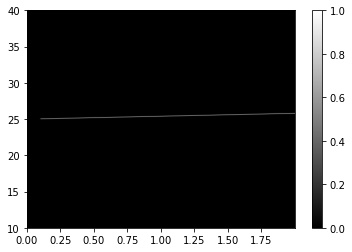

In [4]:
signal=mcg.getSignalPlusNoise(400e6,25e6,0.1e-3, 0)
fmin,fmax,spect=mcg.getSpectrogramFromWaveform(signal)

spect = spect/np.max(spect)

plt.imshow(spect,extent=[mcg.t[0]*1e3,mcg.t[-1]*1e3,fmin/1e6,fmax/1e6],aspect='auto',origin='lower', cmap = 'gray')
plt.colorbar()

print(np.min(spect))
print(np.shape(spect))

# Extension task: generate custom data to investigate how the accuracy depends on the noise temperature. We will generate noiseless data to set a standard for what the ideal accuracy could look like.

In [5]:
noiseless_images = np.zeros((10000, 600, 100))

# Generate two arrays of size 10000
freqs = np.random.uniform(11e6, 39e6, size=(10000,))
times = np.random.uniform(0.1e-3, 1.75e-3, size=(10000,))
# Stack the arrays vertically to form a 10000x2 array
noiseless_labels = np.vstack((times, freqs)).T

for i in range(10000):
    signal=mcg.getSignalPlusNoise(400e6,freqs[i],times[i], 0)
    fmin,fmax,spect=mcg.getSpectrogramFromWaveform(signal) 
    
    noiseless_images[i] = spect

0.1577013831910437 24.058598467218776


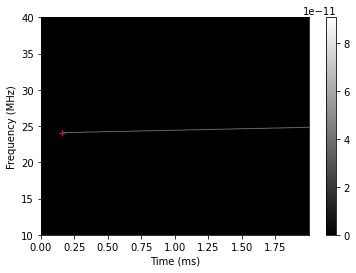

In [9]:
whichImage = 7500

plt.imshow(noiseless_images[whichImage],extent=[mcg.t[0]*1e3,mcg.t[-1]*1e3,fmin/1e6,fmax/1e6],aspect='auto',origin='lower', cmap = 'gray')
plt.plot(noiseless_labels[whichImage, 0]*1e3, noiseless_labels[whichImage, 1]/1e6, 'r+')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')
plt.colorbar()

print(noiseless_labels[whichImage, 0]*1e3, noiseless_labels[whichImage, 1]/1e6)

[0.09013314 0.61689119]


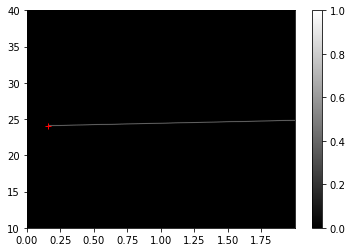

In [11]:
# Normalise images
for i in range(10000):
    noiseless_images[i] = noiseless_images[i]/np.max(noiseless_images[i])


# Find max of each array
max_freq = np.max(freqs)
max_time = np.max(times)

normed_freqs = freqs/max_freq
normed_times = times/max_time
# Stack the arrays vertically to form a 10000x2 array
normed_labels = np.vstack((normed_times, normed_freqs)).T



whichImage = 7500

plt.imshow(noiseless_images[whichImage],extent=[mcg.t[0]*1e3,mcg.t[-1]*1e3,fmin/1e6,fmax/1e6],aspect='auto',origin='lower', cmap = 'gray')
plt.plot(normed_labels[whichImage, 0]*1e3*max_time, normed_labels[whichImage, 1]/1e6*max_freq, 'r+')
plt.colorbar()

print(normed_labels[whichImage])

In [12]:
num_samples = 9000 # Number of training samples

image_sample = noiseless_images[:num_samples] # Create training sample, size (num_samples, 600, 100)
labels_sample = normed_labels[:num_samples] # Training labels, size (num_samples, 2)

# Reshape images array to have 3 dimensions (batch_size, height, width, channels)
images_reshaped = np.reshape(image_sample, (num_samples, 600, 100, 1))

In [18]:
# Define CNN architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(600, 100, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),  # Add Dropout layer
    keras.layers.Dense(2, activation='sigmoid')  # Output layer with 2 neurons
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

# Print model summary
model.summary()



history = model.fit(images_reshaped, labels_sample, epochs=12, batch_size=32,
                    validation_split = 0.1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 60000)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               7680128   
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1024)              132096    
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_8 (Dropout)         (None, 1024)             

## Create epoch against loss plot:

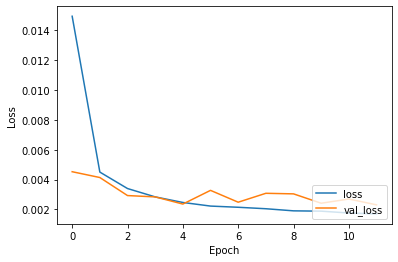

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [94]:
num_samples = 10000 # Now use all 10000 images - we can test on unseen data

test_images = noiseless_images[:num_samples]
test_images_reshaped = np.reshape(test_images, (num_samples, 600, 100, 1))

prediction = model.predict(test_images_reshaped)

313/313 [==============================] - 3s 7ms/step


Normalised Prediction:  [0.8726021  0.45906848]
Normalised Truth value:  [0.87577631 0.44533303]


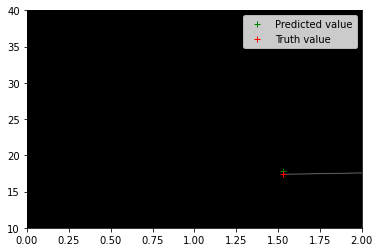

In [114]:
whichEvent = 9810

print('Normalised Prediction: ', prediction[whichEvent])
print('Normalised Truth value: ', normed_labels[whichEvent])
#print('') # Space between lines
#print('Absolute Prediction: ', prediction[whichEvent]*[t0_array_max, f0_array_max], 'in units [time (ms), frequency (MHz)]')
#print('Absolute Truth value: ', noiseless_labels[whichEvent]*[t0_array_max, f0_array_max], 'in units [time (ms), frequency (MHz)]')

plt.imshow(noiseless_images[whichEvent], cmap='gray', extent=[0,2,10,40], aspect='auto', origin='lower')
plt.plot(prediction[whichEvent, 0]*1e3*max_time, prediction[whichEvent, 1]/1e6*max_freq, 'g+', label = 'Predicted value')
plt.plot(noiseless_labels[whichEvent, 0]*1e3, noiseless_labels[whichEvent, 1]/1e6, 'r+', label = 'Truth value')
plt.legend()

In [115]:
# Calculate squared differences between the coordinates
squared_diff = np.sum((prediction - normed_labels) ** 2, axis=1)

# Take square root of the sum to get distance
distances = np.sqrt(squared_diff)



print('Mean distance for train data: ', np.mean(distances[:9000]))
print('Standard deviation for train data: ', np.std(distances[:9000]))
print(' ') # Blank line
print('Mean distance for validation data: ', np.mean(distances[1000:]))
print('Standard deviation for validation data: ', np.std(distances[1000:]))

Mean distance for train data:  0.032888536096842724
Standard deviation for train data:  0.020100420795478118
 
Mean distance for validation data:  0.03354941783846314
Standard deviation for validation data:  0.020909052959193864
